In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lime
!pip install shap

     |████████████████████████████████| 275 kB 14.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9439d57ed267f4ef6562ad3787bb3afd55f331c324b45b3c52b61e227a24ed9f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 356 kB 16.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491643 sha256=790dc00d2c046537b4afc43efb47b37096933d830ad03391d20a3d204c83edbe
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
#Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:

data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Paper1/Telco_customer_churn.xlsx')
print(data.shape)
data.head()

(7043, 33)


CustomerID  Count  ...  CLTV                    ChurnReason
0  3668-QPYBK      1  ...  3239   Competitor made better offer
1  9237-HQITU      1  ...  2701                          Moved
2  9305-CDSKC      1  ...  5372                          Moved
3  7892-POOKP      1  ...  5003                          Moved
4  0280-XJGEX      1  ...  5340  Competitor had better devices

[5 rows x 33 columns]

In [ ]:
#Check for misssing values
data.isnull().sum()# No missing values are present in the dataset

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [ ]:
#Five number summary
data.describe()

Count       ZipCode     Latitude  ...   ChurnValue   ChurnScore         CLTV
count  7043.0   7043.000000  7043.000000  ...  7043.000000  7043.000000  7043.000000
mean      1.0  93521.964646    36.282441  ...     0.265370    58.699418  4400.295755
std       0.0   1865.794555     2.455723  ...     0.441561    21.525131  1183.057152
min       1.0  90001.000000    32.555828  ...     0.000000     5.000000  2003.000000
25%       1.0  92102.000000    34.030915  ...     0.000000    40.000000  3469.000000
50%       1.0  93552.000000    36.391777  ...     0.000000    61.000000  4527.000000
75%       1.0  95351.000000    38.224869  ...     1.000000    75.000000  5380.500000
max       1.0  96161.000000    41.962127  ...     1.000000   100.000000  6500.000000

[8 rows x 9 columns]

In [ ]:
#The info() function is used to print a summary of a DataFrame 
#See the data types and count of values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [ ]:
data['ChurnValue'].value_counts()

0    5174
1    1869
Name: ChurnValue, dtype: int64

In [ ]:
## Bar Plot
def bar_plot(data, plot_title: str, x_axis: str, y_axis: str):
    colors = ["#0080ff",] * len(data)
    colors[0] = "#ff8000"
    trace = go.Bar(y=data.values, x=data.index, text=data.values, 
                    marker_color=colors)
    layout = go.Layout(autosize=False, height=500,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"},  
                    xaxis={"title" : x_axis},
                    yaxis={"title" : y_axis},)
    fig = go.Figure(data=trace, layout=layout)
    fig.update_layout(template="simple_white")
    fig.update_traces(textposition="outside",
                    textfont_size=9,
                    marker=dict(line=dict(color="#000000", width=2)))                
    fig.update_yaxes(automargin=True)
    iplot(fig)


In [ ]:
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
df_aux = data.query('ChurnLabel == "No"')
df_aux = df_aux["Contract"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Contract"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Gender"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "No"')
df_aux = df_aux["Gender"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Partner"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Dependents"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Dependents"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query(('Contract == Month-to-month') and ('ChurnLabel == "Yes"'))
df_aux = df_aux["PaymentMethod"].value_counts()
bar_plot(df_aux, "<b>Payment Method of Month-to-month contract Churned Clients</b>", "<i>Payment Method</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query(('Contract == Month-to-month') and ('ChurnLabel == "Yes"'))
df_aux = df_aux["TenureMonths"].value_counts().head(5)
bar_plot(df_aux, "<b>Tenure of Month-to-month contract for Churned Clients</b>", "<i>Tenure</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["ChurnReason"].value_counts()
bar_plot(df_aux, "<b>Contract Types of not Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [ ]:
#df=data[['City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','ChurnScore','CLTV','ChurnValue']]

In [ ]:
df=data[['Latitude', 'Longitude','City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','ChurnValue']]

In [ ]:
df

Latitude   Longitude  ... TotalCharges ChurnValue
0     33.964131 -118.272783  ...       108.15          1
1     34.059281 -118.307420  ...       151.65          1
2     34.048013 -118.293953  ...        820.5          1
3     34.062125 -118.315709  ...      3046.05          1
4     34.039224 -118.266293  ...       5036.3          1
...         ...         ...  ...          ...        ...
7038  34.341737 -116.539416  ...       1419.4          0
7039  34.667815 -117.536183  ...       1990.5          0
7040  34.559882 -115.637164  ...       7362.9          0
7041  34.167800 -116.864330  ...       346.45          0
7042  34.424926 -117.184503  ...       6844.5          0

[7043 rows x 23 columns]

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
labelencoder=LabelEncoder()

#labeleconder the categorical columns
df.iloc[:,2] =labelencoder.fit_transform(df.iloc[0:,2].values)
df.iloc[:,3] =labelencoder.fit_transform(df.iloc[0:,3].values)
df.iloc[:,4] =labelencoder.fit_transform(df.iloc[0:,4].values)
df.iloc[:,5] =labelencoder.fit_transform(df.iloc[0:,5].values)
df.iloc[:,6] =labelencoder.fit_transform(df.iloc[0:,6].values)
df.iloc[:,8] =labelencoder.fit_transform(df.iloc[0:,8].values)
df.iloc[:,9] =labelencoder.fit_transform(df.iloc[0:,9].values)
df.iloc[:,10] =labelencoder.fit_transform(df.iloc[0:,10].values)
df.iloc[:,11] =labelencoder.fit_transform(df.iloc[0:,11].values)
df.iloc[:,12] =labelencoder.fit_transform(df.iloc[0:,12].values)
df.iloc[:,13] =labelencoder.fit_transform(df.iloc[0:,13].values)
df.iloc[:,14] =labelencoder.fit_transform(df.iloc[0:,14].values)
df.iloc[:,15] =labelencoder.fit_transform(df.iloc[0:,15].values)
df.iloc[:,16] =labelencoder.fit_transform(df.iloc[0:,16].values)
df.iloc[:,17] =labelencoder.fit_transform(df.iloc[0:,17].values)
df.iloc[:,18] =labelencoder.fit_transform(df.iloc[0:,18].values)
df.iloc[:,19] =labelencoder.fit_transform(df.iloc[0:,19].values)

In [ ]:
df


Latitude   Longitude  City  ...  MonthlyCharges  TotalCharges  ChurnValue
0     33.964131 -118.272783   562  ...           53.85        108.15           1
1     34.059281 -118.307420   562  ...           70.70        151.65           1
2     34.048013 -118.293953   562  ...           99.65        820.50           1
3     34.062125 -118.315709   562  ...          104.80       3046.05           1
4     34.039224 -118.266293   562  ...          103.70       5036.30           1
...         ...         ...   ...  ...             ...           ...         ...
7038  34.341737 -116.539416   521  ...           21.15       1419.40           0
7039  34.667815 -117.536183     2  ...           84.80       1990.50           0
7040  34.559882 -115.637164    22  ...          103.20       7362.90           0
7041  34.167800 -116.864330    26  ...           29.60        346.45           0
7042  34.424926 -117.184503    32  ...          105.65       6844.50           0

[7043 rows x 23 columns]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          7032 non-null   float64
 1   Longitude         7032 non-null   float64
 2   City              7032 non-null   int64  
 3   Gender            7032 non-null   int64  
 4   SeniorCitizen     7032 non-null   int64  
 5   Partner           7032 non-null   int64  
 6   Dependents        7032 non-null   int64  
 7   TenureMonths      7032 non-null   int64  
 8   PhoneService      7032 non-null   int64  
 9   MultipleLines     7032 non-null   int64  
 10  InternetService   7032 non-null   int64  
 11  OnlineSecurity    7032 non-null   int64  
 12  OnlineBackup      7032 non-null   int64  
 13  DeviceProtection  7032 non-null   int64  
 14  TechSupport       7032 non-null   int64  
 15  StreamingTV       7032 non-null   int64  
 16  StreamingMovies   7032 non-null   int64  


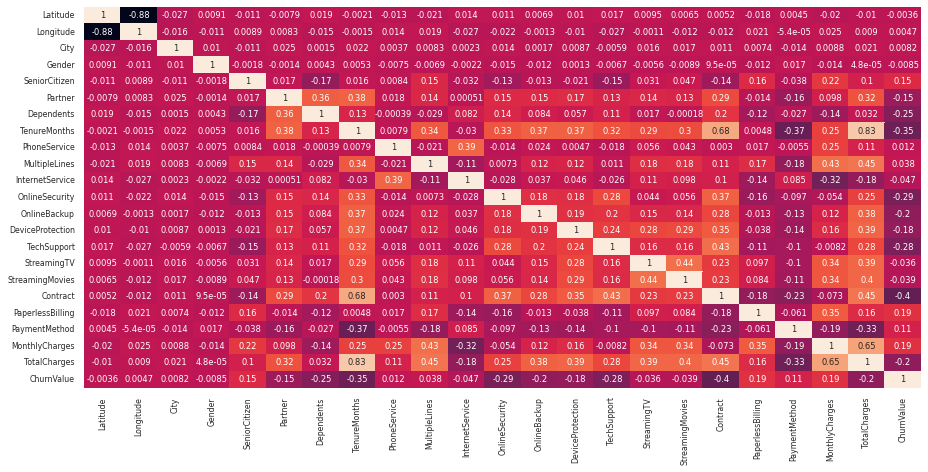

In [ ]:
# Heatmap Correlation - correlation analysis was performed to determine the relationship between the outcome and other variables.
#The relationship lies between -1 and +1, with negative being a weak relationship and positive a being strong relationship
plt.figure(figsize=(15,7))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(),annot=True,cbar=False );

In [ ]:
# Class count
count_class_0, count_class_1 = df.ChurnValue.value_counts()

# Divide by class
df_class_0 = df[df['ChurnValue'] == 0]
df_class_1 = df[df['ChurnValue'] == 1]

Random under-sampling:
1    1869
0    1869
Name: ChurnValue, dtype: int64


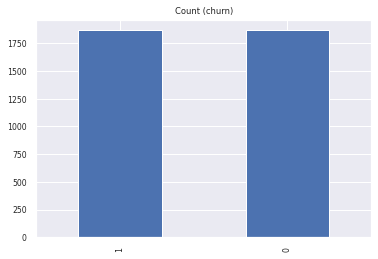

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_undersampling = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_undersampling.ChurnValue.value_counts())

df_test_undersampling.ChurnValue.value_counts().plot(kind='bar', title='Count (churn)');

In [ ]:
#Create independent and Dependent Features
LABELS = ["0", "1"]
columns = df_test_undersampling.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["ChurnValue"]]
# Store the variable we are predicting 
target = "ChurnValue"
# Define a random state 
state = np.random.RandomState(42)
X = df_test_undersampling[columns]
Y = df_test_undersampling[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3738, 22)
(3738,)


In [ ]:
#b. 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
seed=7
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=seed) #.ravel will convert that array shape to (n, )
print("X training size\t| X validation size\t| y training size\t| Y validation size")
print(str(X_train.shape) + "\t  " + str(X_test.shape) + "\t\t  " + str(y_train.shape) + "\t\t   " + str(y_test.shape))

X training size	| X validation size	| y training size	| Y validation size
(2990, 22)	  (748, 22)		  (2990,)		   (748,)


In [ ]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]
pd.set_option('display.max_columns', None)
# model explainability use case

from lime.lime_tabular import LimeTabularExplainer
import shap

In [ ]:
max_features = 3
num_trees = 100

from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
print("-------------------------- Performing Randomized Grid Search for Random Forest ---------------------------------")
paramsRF = {"n_estimators": [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
            "max_features": ['auto', 'sqrt', 'log2', None],
#           “max_depth”: [int(x) for x in np.linspace(10, 110, num = 11)],
            "max_depth": [5, 10, 15, 20, None],
#           “min_samples_split”: [5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False] }

search_rf = RandomizedSearchCV(model, param_distributions=paramsRF, random_state=seed, cv=5, n_iter=100, verbose=1, n_jobs=3, return_train_score=True,
                                    scoring = ['accuracy'], refit='accuracy')
search_rf.fit(X_train, y_train)
result_rf = pd.DataFrame(search_rf.cv_results_)
print("\nBest parameter options:", search_rf.estimator.get_params().keys())
rf_best_params = search_rf.best_estimator_

-------------------------- Performing Randomized Grid Search for Random Forest ---------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 13.6min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 15.4min finished



Best parameter options: dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [ ]:
modelRF_optimized = rf_best_params
model = modelRF_optimized.fit(X_train, y_train)

In [ ]:
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')

In [ ]:
# model performance
model_auc(model)
# predicting the likelihood for the validation set
y_pred =model.predict_proba(X_test)[:, 1]

Train AUC: 0.877091177556294, Val Auc: 0.840924049908425


AUC score of the model is 0.840924049908425


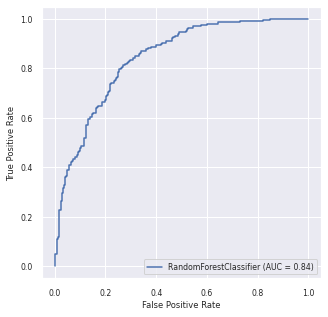

In [ ]:
# checking the roc_auc_curve
print('AUC score of the model is {}'.format(roc_auc_score(y_test, y_pred)))
# the visualization of roc_auc score
plot_roc_curve(model, X_test, y_test)

In [ ]:
print("------------------------------ Testing --------------------------------")
# Test using optimised models
#1.
predsRF = model.predict(X_test)
print(classification_report(y_test, predsRF,target_names=["Churn No", "Churn Yes"]))
cmRF = confusion_matrix(y_test, predsRF)
print(cmRF)

------------------------------ Testing --------------------------------
              precision    recall  f1-score   support

    Churn No       0.80      0.73      0.76       384
   Churn Yes       0.74      0.81      0.77       364

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748

[[280 104]
 [ 70 294]]


In [ ]:
# import seaborn as sns
# SVM=sns.heatmap(cmRF, annot=True, fmt = '.0f',xticklabels=["Churn No", "Churn Yes"], yticklabels=["Churn No", "Churn Yes"])


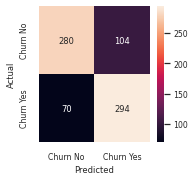

In [ ]:
import seaborn as sns
plt.figure(figsize=(2.5,2.5))
SVM=sns.heatmap(cmRF, annot=True, fmt = '.0f',xticklabels=["Churn No", "Churn Yes"], yticklabels=["Churn No", "Churn Yes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# X = df[['City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','ChurnScore','CLTV']]
# X_featurenames = X.columns

In [ ]:
df=data[['Latitude', 'Longitude','City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','ChurnValue']]
X_featurenames = X.columns

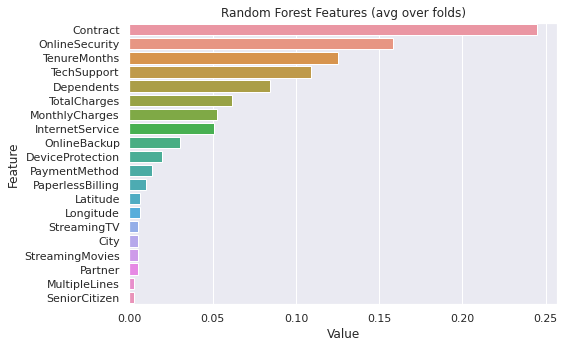

In [ ]:
feature_imp= pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(8, 5))
sns.set(font_scale = 1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:20])
plt.title('Random Forest Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()

In [ ]:
X_test.iloc[0:10]

Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
1738  41.924174 -123.260788   921       1              0        0           0   
4063  40.057784 -123.679461   359       0              0        1           1   
137   33.644849 -117.684254   511       1              0        0           0   
2972  39.597975 -122.032248   374       1              1        1           0   
677   37.815459 -121.977203   244       1              0        1           0   
7     34.066303 -118.435479   562       1              0        0           0   
2237  33.910800 -117.398153   844       1              1        1           0   
1574  37.594850 -122.051521  1041       0              0        0           0   
3805  37.674002 -122.076796   414       1              0        1           1   
6512  38.626128 -121.328011   162       0              0        0           0   

      TenureMonths  PhoneService  MultipleLines  InternetService  \
1738            16             1              0                2   
4063            65             1              2                1   
137             10             1              2                1   
2972            64             1              2                1   
677             10             1              0                1   
7                1             1              0                2   
2237            61             1              2                0   
1574            31             1              2                1   
3805            25             1              0                2   
6512            60             0              1                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
1738               1             1                 1            1   
4063               2             0                 2            2   
137                0             0                 0            0   
2972               0             2                 2            0   
677                0             0                 0            0   
7                  1             1                 1            1   
2237               0             2                 0            0   
1574               0             0                 2            0   
3805               1             1                 1            1   
6512               2             0                 2            0   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
1738            1                1         0                 0              0   
4063            2                2         2                 0              2   
137             2                0         0                 1              0   
2972            0                2         0                 1              2   
677             0                0         0                 1              2   
7               1                1         0                 0              3   
2237            0                2         1                 0              0   
1574            0                2         0                 1              2   
3805            1                1         1                 0              2   
6512            0                2         1                 1              2   

      MonthlyCharges  TotalCharges  
1738           20.25        327.45  
4063          109.30       7337.55  
137            86.05        834.10  
2972           94.25       6081.40  
677            70.30        738.20  
7              20.15         20.15  
2237           64.05       3902.60  
1574           89.90       2806.90  
3805           19.90        505.45  
6512           44.45       2773.90

In [ ]:
y_test.iloc[0:10]

1738    1
4063    0
137     1
2972    0
677     1
7       1
2237    0
1574    1
3805    0
6512    0
Name: ChurnValue, dtype: int64

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_featurenames,
    class_names=['no', 'yes'],
    feature_selection = "lasso_path", 
    discretize_continuous = True, 
     discretizer = "quartile",
     verbose=True,
    mode='classification'
)

In [ ]:
X_test.iloc[1]

Latitude              40.057784
Longitude           -123.679461
City                 359.000000
Gender                 0.000000
SeniorCitizen          0.000000
Partner                1.000000
Dependents             1.000000
TenureMonths          65.000000
PhoneService           1.000000
MultipleLines          2.000000
InternetService        1.000000
OnlineSecurity         2.000000
OnlineBackup           0.000000
DeviceProtection       2.000000
TechSupport            2.000000
StreamingTV            2.000000
StreamingMovies        2.000000
Contract               2.000000
PaperlessBilling       0.000000
PaymentMethod          2.000000
MonthlyCharges       109.300000
TotalCharges        7337.550000
Name: 4063, dtype: float64

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[1]))
print("Model's prediction: {}".format(y_pred[1]))


Test data (actual observation): 0
Model's prediction: 0.13076438693335912


In [ ]:
exp = explainer.explain_instance(X_test.iloc[1], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.5816764709358315
Prediction_local [0.0928111]
Right: 0.13076438693335912


In [ ]:
X_test.iloc[9]

Latitude              38.626128
Longitude           -121.328011
City                 162.000000
Gender                 0.000000
SeniorCitizen          0.000000
Partner                0.000000
Dependents             0.000000
TenureMonths          60.000000
PhoneService           0.000000
MultipleLines          1.000000
InternetService        0.000000
OnlineSecurity         2.000000
OnlineBackup           0.000000
DeviceProtection       2.000000
TechSupport            0.000000
StreamingTV            0.000000
StreamingMovies        2.000000
Contract               1.000000
PaperlessBilling       1.000000
PaymentMethod          2.000000
MonthlyCharges        44.450000
TotalCharges        2773.900000
Name: 6512, dtype: float64

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[9]))
print("Model's prediction: {}".format(y_pred[9]))

Test data (actual observation): 0
Model's prediction: 0.2421644884666366


In [ ]:
exp = explainer.explain_instance(X_test.iloc[9], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.39708163204341596
Prediction_local [0.26315354]
Right: 0.2421644884666366


In [ ]:
 # Display weight graph
#exp.as_pyplot_figure()

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[1]))
print("Model's prediction: {}".format(y_pred[1]))

Test data (actual observation): 0
Model's prediction: 0.13076438693335912


In [ ]:
# exp = explainer.explain_instance(X_test.iloc[1], model.predict_proba)
# exp.show_in_notebook(show_table = True, show_all = False)

AttributeError: ignored

In [ ]:
X_test.iloc[2]

Latitude             33.644849
Longitude          -117.684254
City                511.000000
Gender                1.000000
SeniorCitizen         0.000000
Partner               0.000000
Dependents            0.000000
TenureMonths         10.000000
PhoneService          1.000000
MultipleLines         2.000000
InternetService       1.000000
OnlineSecurity        0.000000
OnlineBackup          0.000000
DeviceProtection      0.000000
TechSupport           0.000000
StreamingTV           2.000000
StreamingMovies       0.000000
Contract              0.000000
PaperlessBilling      1.000000
PaymentMethod         0.000000
MonthlyCharges       86.050000
TotalCharges        834.100000
Name: 137, dtype: float64

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[2]))
print("Model's prediction: {}".format(y_pred[2]))

Test data (actual observation): 1
Model's prediction: 0.8094444358612762


In [ ]:

exp = explainer.explain_instance(X_test.iloc[2], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)


Intercept 0.0478491931419297
Prediction_local [0.76612249]
Right: 0.8094444358612762


In [ ]:
 # Display weight graph
#exp.as_pyplot_figure()

In [ ]:
X_test.iloc[4]

Latitude             37.815459
Longitude          -121.977203
City                244.000000
Gender                1.000000
SeniorCitizen         0.000000
Partner               1.000000
Dependents            0.000000
TenureMonths         10.000000
PhoneService          1.000000
MultipleLines         0.000000
InternetService       1.000000
OnlineSecurity        0.000000
OnlineBackup          0.000000
DeviceProtection      0.000000
TechSupport           0.000000
StreamingTV           0.000000
StreamingMovies       0.000000
Contract              0.000000
PaperlessBilling      1.000000
PaymentMethod         2.000000
MonthlyCharges       70.300000
TotalCharges        738.200000
Name: 677, dtype: float64

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[4]))
print("Model's prediction: {}".format(y_pred[4]))

Test data (actual observation): 1
Model's prediction: 0.7720058706553096


In [ ]:
exp = explainer.explain_instance(X_test.iloc[4], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.06700743042903379
Prediction_local [0.7253629]
Right: 0.7720058706553096


In [ ]:
 # Display weight graph
#exp.as_pyplot_figure()

In [ ]:
y_test.iloc[0:60]

1738    1
4063    0
137     1
2972    0
677     1
7       1
2237    0
1574    1
3805    0
6512    0
5467    0
3177    0
2658    0
2187    0
1091    1
5422    0
861     1
6704    0
2879    0
1659    1
4027    0
3240    0
6222    0
4373    0
6830    0
6689    0
792     1
4652    0
6559    0
185     1
1347    1
632     1
1631    1
1299    1
2814    0
1456    1
6036    0
361     1
3955    0
888     1
5716    0
1223    1
830     1
1282    1
1169    1
6169    0
4085    0
2010    0
1140    1
553     1
1664    1
5198    0
162     1
4493    0
4303    0
5585    0
490     1
1312    1
3493    0
1194    1
Name: ChurnValue, dtype: int64

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[17]))
print("Model's prediction: {}".format(y_pred[17]))

Test data (actual observation): 0
Model's prediction: 0.36509536500404693


In [ ]:
exp = explainer.explain_instance(X_test.iloc[17], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.288992373469777
Prediction_local [0.51890748]
Right: 0.36509536500404693


In [ ]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = X.loc[features.index]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]   

Explainer Expected Value: [0.49665552 0.50334448]


In [ ]:
#shap.summary_plot(shap_values,feature_display,plot_type='bar')

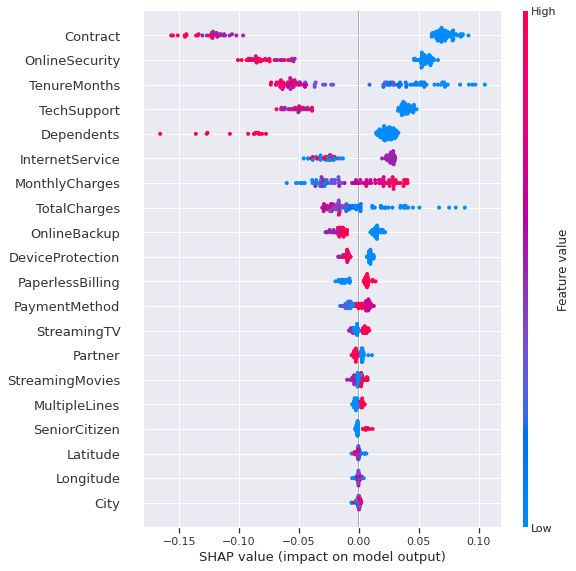

In [ ]:
shap.summary_plot(shap_values,features)

In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]


Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
4063  40.057784 -123.679461   359       0              0        1           1   

      TenureMonths  PhoneService  MultipleLines  InternetService  \
4063            65             1              2                1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
4063               2             0                 2            2   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
4063            2                2         2                 0              2   

      MonthlyCharges  TotalCharges  
4063           109.3       7337.55

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 22)


[array([[ 0.00215143,  0.00157194,  0.00040579, -0.0001344 ,  0.00099441,
          0.00459813,  0.12702717,  0.06420295, -0.00016336, -0.00176252,
         -0.01936619,  0.05909401, -0.0180223 ,  0.00686686,  0.03905498,
         -0.00429189, -0.00162852,  0.11823041,  0.00983687, -0.00782624,
         -0.03022703,  0.02196761]]),
 array([[-0.00215143, -0.00157194, -0.00040579,  0.0001344 , -0.00099441,
         -0.00459813, -0.12702717, -0.06420295,  0.00016336,  0.00176252,
          0.01936619, -0.05909401,  0.0180223 , -0.00686686, -0.03905498,
          0.00429189,  0.00162852, -0.11823041, -0.00983687,  0.00782624,
          0.03022703, -0.02196761]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 0


In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 5
end_index = 6
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
7  34.066303 -118.435479   562       1              0        0           0   

   TenureMonths  PhoneService  MultipleLines  InternetService  OnlineSecurity  \
7             1             1              0                2               1   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
7             1                 1            1            1                1   

   Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
7         0                 0              3           20.15         20.15

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 22)


[array([[ 0.00148956, -0.00082349, -0.00028298,  0.00039327,  0.00094169,
         -0.00394376, -0.01532435, -0.09188569,  0.0004781 ,  0.00064629,
          0.02326354,  0.06890795,  0.02030947,  0.01187941,  0.05055808,
          0.00514175,  0.00373703, -0.07847065,  0.01679616, -0.00128721,
          0.03560818, -0.07532611]]),
 array([[-0.00148956,  0.00082349,  0.00028298, -0.00039327, -0.00094169,
          0.00394376,  0.01532435,  0.09188569, -0.0004781 , -0.00064629,
         -0.02326354, -0.06890795, -0.02030947, -0.01187941, -0.05055808,
         -0.00514175, -0.00373703,  0.07847065, -0.01679616,  0.00128721,
         -0.03560818,  0.07532611]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 1


In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 10
end_index = 11
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
5467  41.528541 -122.955018   388       0              0        1           0   

      TenureMonths  PhoneService  MultipleLines  InternetService  \
5467            72             1              2                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
5467               2             0                 2            2   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
5467            2                2         2                 1              0   

      MonthlyCharges  TotalCharges  
5467            84.9        6065.3

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 22)


[array([[-0.00146375,  0.00109853,  0.00062227, -0.00021571,  0.00126016,
          0.00239866, -0.02316727,  0.07357794, -0.0002968 , -0.00190023,
          0.02411088,  0.07031859, -0.01856964,  0.00971102,  0.04732041,
         -0.00447234, -0.00263287,  0.14400341, -0.00504694,  0.01115062,
         -0.00123501,  0.01935637]]),
 array([[ 0.00146375, -0.00109853, -0.00062227,  0.00021571, -0.00126016,
         -0.00239866,  0.02316727, -0.07357794,  0.0002968 ,  0.00190023,
         -0.02411088, -0.07031859,  0.01856964, -0.00971102, -0.04732041,
          0.00447234,  0.00263287, -0.14400341,  0.00504694, -0.01115062,
          0.00123501, -0.01935637]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 0


In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 56
end_index = 57
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
490  34.130992 -118.894673  1084       0              0        0           0   

     TenureMonths  PhoneService  MultipleLines  InternetService  \
490             3             1              0                1   

     OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
490               0             2                 0            0            2   

     StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
490                0         0                 0              2   

     MonthlyCharges  TotalCharges  
490           83.75        247.25

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 22)


[array([[-8.35867744e-04,  5.05438815e-04,  1.33215298e-03,
         -3.62196557e-04,  7.96397857e-04, -2.85651023e-03,
         -2.11344485e-02, -5.12641915e-02,  2.39433906e-04,
          3.15854734e-03, -2.67436626e-02, -6.09490607e-02,
          1.70026698e-02, -9.98843899e-03, -3.67827552e-02,
         -4.14407786e-03, -2.42543820e-05, -6.94083980e-02,
          1.45031868e-02, -5.95181548e-03, -1.69538999e-02,
         -1.94929020e-02]]),
 array([[ 8.35867744e-04, -5.05438815e-04, -1.33215298e-03,
          3.62196557e-04, -7.96397857e-04,  2.85651023e-03,
          2.11344485e-02,  5.12641915e-02, -2.39433906e-04,
         -3.15854734e-03,  2.67436626e-02,  6.09490607e-02,
         -1.70026698e-02,  9.98843899e-03,  3.67827552e-02,
          4.14407786e-03,  2.42543820e-05,  6.94083980e-02,
         -1.45031868e-02,  5.95181548e-03,  1.69538999e-02,
          1.94929020e-02]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 1


In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index = 5
end_index = 9
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

Latitude   Longitude  City  Gender  SeniorCitizen  Partner  Dependents  \
7     34.066303 -118.435479   562       1              0        0           0   
2237  33.910800 -117.398153   844       1              1        1           0   
1574  37.594850 -122.051521  1041       0              0        0           0   
3805  37.674002 -122.076796   414       1              0        1           1   

      TenureMonths  PhoneService  MultipleLines  InternetService  \
7                1             1              0                2   
2237            61             1              2                0   
1574            31             1              2                1   
3805            25             1              0                2   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
7                  1             1                 1            1   
2237               0             2                 0            0   
1574               0             0                 2            0   
3805               1             1                 1            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
7               1                1         0                 0              3   
2237            0                2         1                 0              0   
1574            0                2         0                 1              2   
3805            1                1         1                 0              2   

      MonthlyCharges  TotalCharges  
7              20.15         20.15  
2237           64.05       3902.60  
1574           89.90       2806.90  
3805           19.90        505.45

In [ ]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(4, 22)


[array([[ 1.48956446e-03, -8.23490460e-04, -2.82975641e-04,
          3.93271865e-04,  9.41690106e-04, -3.94375829e-03,
         -1.53243499e-02, -9.18856867e-02,  4.78096080e-04,
          6.46292902e-04,  2.32635364e-02,  6.89079515e-02,
          2.03094665e-02,  1.18794058e-02,  5.05580844e-02,
          5.14174736e-03,  3.73702934e-03, -7.84706529e-02,
          1.67961602e-02, -1.28721317e-03,  3.56081831e-02,
         -7.53261110e-02],
        [-6.94827120e-05, -7.69747866e-04, -1.23180993e-03,
         -4.17210366e-05, -5.70517951e-03,  3.38269562e-03,
         -2.59559784e-02,  6.45502064e-02,  7.70306270e-04,
         -1.39511931e-03,  2.78021553e-02, -5.81237446e-02,
          1.01760032e-02, -1.12926058e-02, -4.08327534e-02,
          3.94824622e-03, -6.16439811e-03,  1.22754246e-01,
          1.21782868e-02,  1.29309623e-02,  2.97899595e-02,
          2.97989460e-02],
        [ 3.64559361e-04,  5.01105369e-04, -1.67113410e-03,
         -1.98728819e-04,  1.99686309e-03, -2.